In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import invgamma, norm
import scipy.stats as stats
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [14]:
# Define parameters for the prior distributions
mu0 = 0
std0 = 1
alpha = 2
beta = 1
n0 = 50

# Define prior distributions
mu = np.random.normal(mu0, std0)
variance = invgamma(alpha, scale=beta).rvs()
sigma = np.sqrt(variance)
print(mu, sigma)

# Generate X
x_set = np.random.normal(mu, sigma, n0)
print(x_set)

-0.37948838063741885 0.5698131049598973
[-0.50957884 -0.07222213 -0.24502397 -0.57757356  0.61105102 -0.17449358
  0.16103925 -0.16251293 -0.35244834 -0.48060897 -1.59602059  0.65614233
 -0.8289644   0.08207279 -0.44536734  0.41605388 -0.45064098 -0.40988906
 -0.94601879 -1.29024348 -0.84088764 -0.07202357  0.39053339 -0.40174623
 -0.42933742 -0.62700142 -1.37612508 -0.85328026 -1.26064817 -0.25467473
  0.06949661 -0.12567935 -0.48145765 -0.18150158 -0.59626388 -0.2802503
 -0.67887441 -0.52794952 -0.18806578  0.31472183 -0.80017097 -0.14896877
  0.80657192 -1.12506448 -0.78959641 -0.87519576  0.42656168 -0.62517337
  0.10714002 -0.78210739]


$\mu|\sigma, X \sim N(\mu_n = \frac{\frac{\sum \limits_{i=1}^n X_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}}{\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}},
\sigma_n^2 = \left(\frac{n}{\sigma^2} +\frac{1}{\sigma_0^2}\right)^{-1})$\
$\sigma|\mu, X\sim IG(\alpha_n=\alpha+\frac{n}{2},\beta_n=\beta+\frac{1}{2}\Sigma_{i=1}^n(X_i-\mu)^2)$

In [15]:
# Initial parameters
mu1 = ((sum(x_set) / variance) + (mu0 / (std0 ** 2))) / ((n0 / variance) + (1 / (std0 ** 2)))
sigma1 = 1 / ((n0 / variance) + (1 / (std0 ** 2)))
alpha_n = alpha + n0 / 2
beta1 = beta + 0.5 * sum((x_set - mu) ** 2)
print(mu1, sigma1)

def mu_n(var):
    return ((sum(x_set) / var) + (mu0 / (std0 ** 2))) / ((n0 / var) + (1 / (std0 ** 2)))

def sigma_n(var):
    return 1 / ((n0 / var) + (1 / (std0 ** 2)))

def beta_n(mu):
    return beta + 0.5 * sum((x_set - mu) ** 2)


-0.37401656153844615 0.006451842904616947


In [16]:
n = 10000

mu_set = [mu1]
sigma_set = [sigma1]
for i in range(0, n):
    
    # given sigma suqare and then generating mu
    x = np.random.normal(mu_n(sigma_set[i]), np.sqrt(sigma_n(sigma_set[i])))
    mu_set.append(x)

    # given mu and then generating sigma square
    y = invgamma(alpha_n, scale = beta_n(mu_set[i])).rvs()
    sigma_set.append(y)

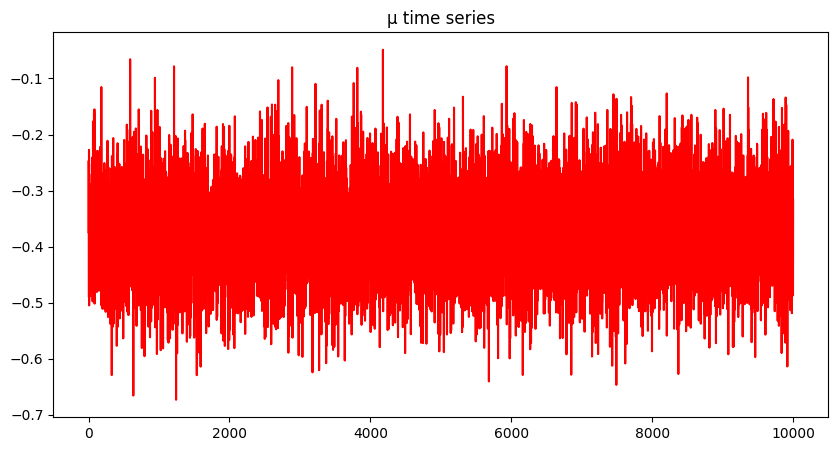

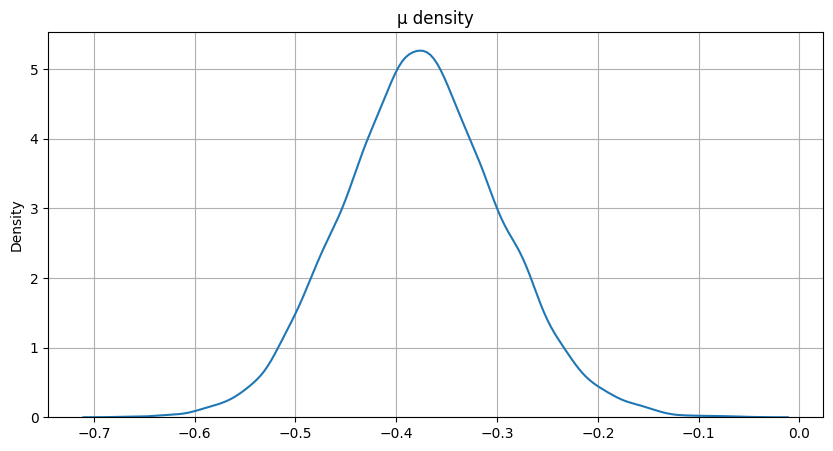

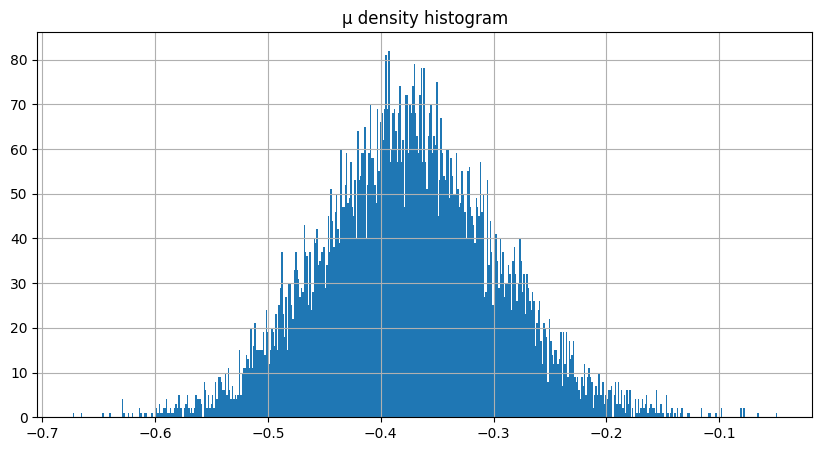

In [17]:
plt.figure(figsize = (10, 5))
plt.title('µ time series')
plt.plot(mu_set, 'r')
plt.show()

plt.figure(figsize = (10, 5))
plt.title('µ density')
sns.kdeplot(mu_set)
plt.grid(True)
plt.show()

plt.figure(figsize = (10, 5))
plt.title('µ density histogram')
plt.hist(mu_set, bins = 500)
plt.grid(True)
plt.show()

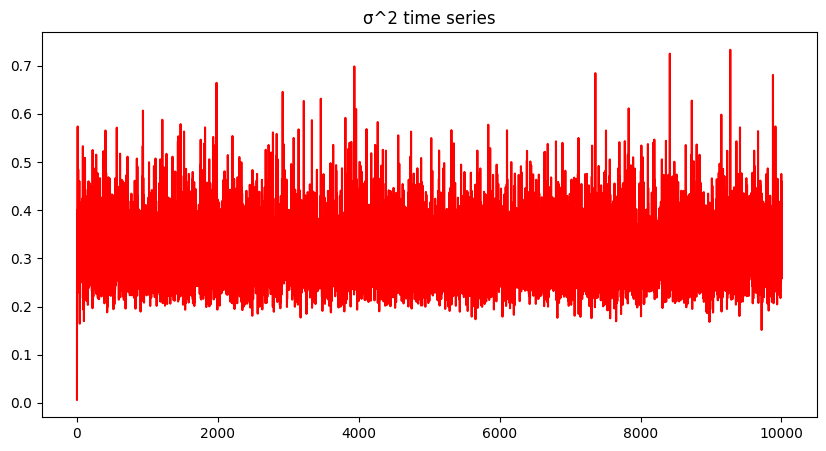

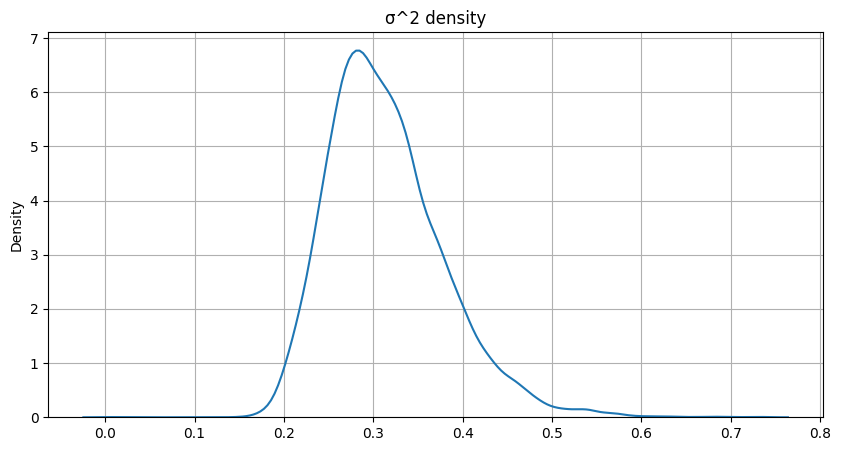

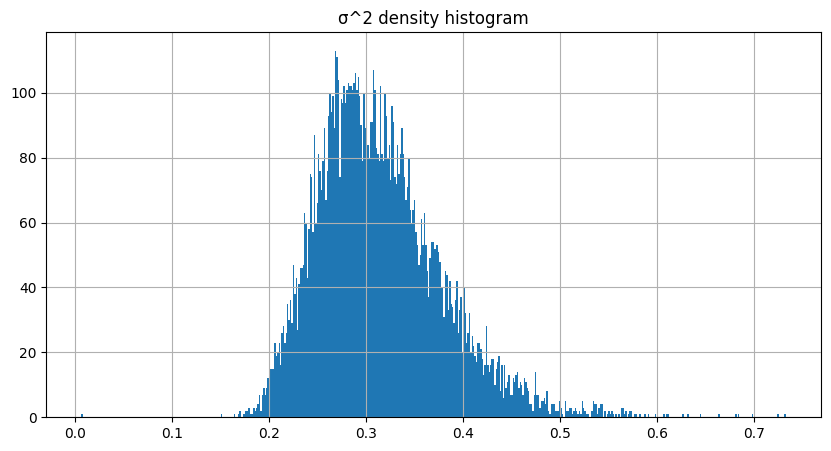

In [18]:
plt.figure(figsize = (10, 5))
plt.title('σ^2 time series')
plt.plot(sigma_set, 'r')
plt.show()

plt.figure(figsize = (10, 5))
plt.title('σ^2 density')
sns.kdeplot(sigma_set)
plt.grid(True)
plt.show()

plt.figure(figsize = (10, 5))
plt.title('σ^2 density histogram')
plt.hist(sigma_set, bins = 500)
plt.grid(True)
plt.show()

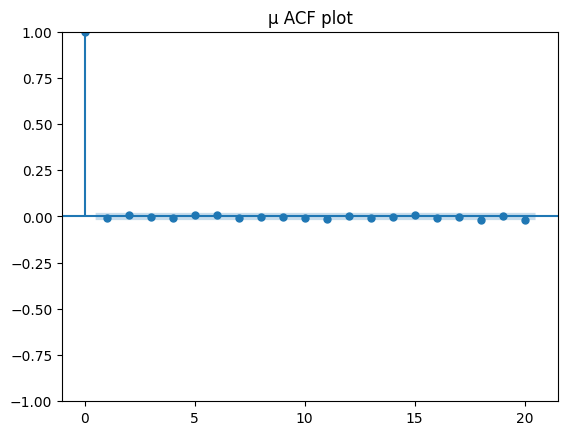

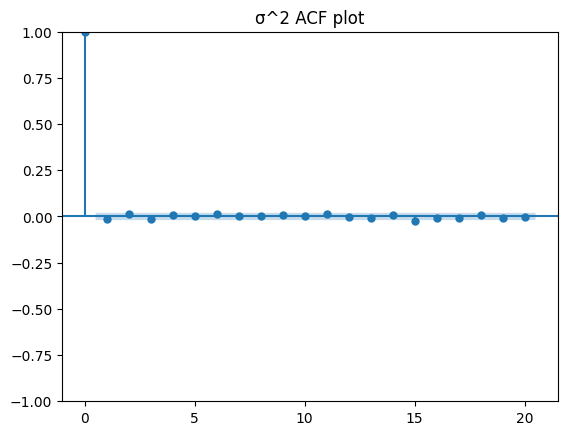

In [19]:
plot_acf(np.array(mu_set), lags = 20)
plt.title('µ ACF plot')
plt.show()

plot_acf(np.array(sigma_set), lags = 20)
plt.title('σ^2 ACF plot')
plt.show()